# Análise de Regressão

A análise de regressão consiste em um conjunto de métodos de Machine Learning que nos permitem prever uma variável de resultado contínua (**y**) com base no valor de uma ou várias variáveis preditoras (**x**).

Resumidamente, o objetivo do modelo de regressão é construir uma equação matemática que defina **y** como uma função das variáveis **x**. Em seguida, esta equação pode ser usada para prever o resultado (**y**) com base em novos valores das variáveis preditoras (**x**).

O melhor modelo é definido como o modelo que apresenta o **menor erro de predição**. 

As métricas mais populares para comparar modelos de regressão incluem:

- **Root Mean Squared Error**: que mede o erro de predição do modelo. Corresponde à diferença média entre os valores conhecidos observados do resultado e o valor previsto pelo modelo. RMSE é calculado como `RMSE = sqrt(média((observados - previstos)^2))`. Quanto menor o RMSE, melhor é o modelo.

- **R-square Ajustado**: que representa a proporção da variação (ou seja, informações), em seus dados, explicada pelo modelo. Isso corresponde à qualidade geral do modelo. Quanto maior o **R^2 ajustado**, melhor será o modelo.

Observe que as métricas mencionadas acima devem ser calculadas em novos dados de teste que não foram usados para treinar (ou seja, construir) o modelo. Se você tiver um grande conjunto de dados, com muitos registros, poderá dividir aleatoriamente os dados em conjunto de treinamento (80% para construir o modelo preditivo) e conjunto de teste ou conjunto de validação (20% para avaliar o desempenho do modelo).

Para mais detalhes sobre Regressão, visite: [STHDA](http://www.sthda.com/english/wiki/regression-analysis-essentials-for-machine-learning)

Neste notebook, vamos explorar a tarefa de regressão com o algoritmo Random Forest, também iremos compará-lo com uma variedade de outros modelos de regressão disponíveis na biblioteca Scikit-Learn.

## Dados

Trabalharemos com dados artificiais, no qual é a modelagem de sinais de raio x versus densidade de rochas.

Trata-se de uma situação em que uma máquina está perfurando túneis, e essas máquinas podem ter escudos de corte diferente dependendo da densidade da rocha.

Por isso, está sendo usado sinais de raio X para determinar a densidade da rocha, baseado na força do sinal de retorno em **nHz**, é possível estimar a densidade da rocha em **kg/m³**.

Temos alguns resultados experimentais baseados em testes de laboratório em uma variade de amostras de rocha.

Nosso objetivo então é criar um modelo generalizado, no qual podemos usar para aceitar um sinal de retorno como **input** e trará como **output** uma densidade de rocha esperada.

Primeiramente vamos importar as bibliotecas necessárias para trabalharmos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

E agora devemos carregar os dados em um **DataFrame** pandas.

In [2]:
df = pd.read_csv('dados/rock_density_xray.csv')

Observamos as primeiras entradas do nosso **DataFrame**.

In [3]:
df.head(8)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
5,89.647973,2.499600
6,69.492733,2.385000
7,20.150520,2.500673


Com quantos dados estamos lidando no total?

In [4]:
len(df)

300

Vamos renomear as colunas para facilitar o acesso a elas.

In [5]:
df.columns = ['Signal','Density']

E agora plotamos os dados através de um **scatterplot** para melhor visualização dos mesmos.

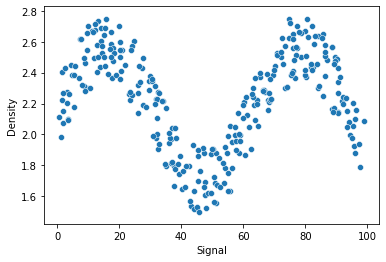

In [6]:
sns.scatterplot(x='Signal', y='Density', data=df);

Podemos observar que temos um padrão semelhante a uma onda senoinal.

## Machine Learning

Agora veremos se podemos usar um modelo linear como **Linear Regression** nestes dados.

E eventualmente veremos que ele será inviável, então evoluíremos para modelos mais complexos.

Vamos então dividir os dados em dois conjuntos diferentes (X & y).

In [7]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

E também dividir eles em conjuntos de treinamento e teste.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

E agora vamos instanciar o modelo de Regressão Linear.

In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

E treinamos o modelo que definimos.

In [12]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vejamos o desempenho de nosso modelo com algumas métricas.

In [13]:
lr_preds = lr_model.predict(X_test)
lr_preds[:10]

array([2.21488091, 2.22837538, 2.22001413, 2.23170467, 2.21601133,
       2.22924788, 2.23204331, 2.22948377, 2.22266988, 2.21902707])

In [14]:
y_test[:10]

188    2.704341
29     2.561375
297    1.879181
215    2.090040
39     2.499128
93     2.686145
28     2.072813
88     2.501363
76     1.535488
171    1.957416
Name: Density, dtype: float64

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**MAE**

In [16]:
mean_absolute_error(y_test, lr_preds)

0.3050895347509094

**RMSE**

In [17]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.35204872731059866

Novamente vamos observar os nossos dados através de um gráfico, nossa intuito é tentar entender o que está ocorrendo com este modelo.

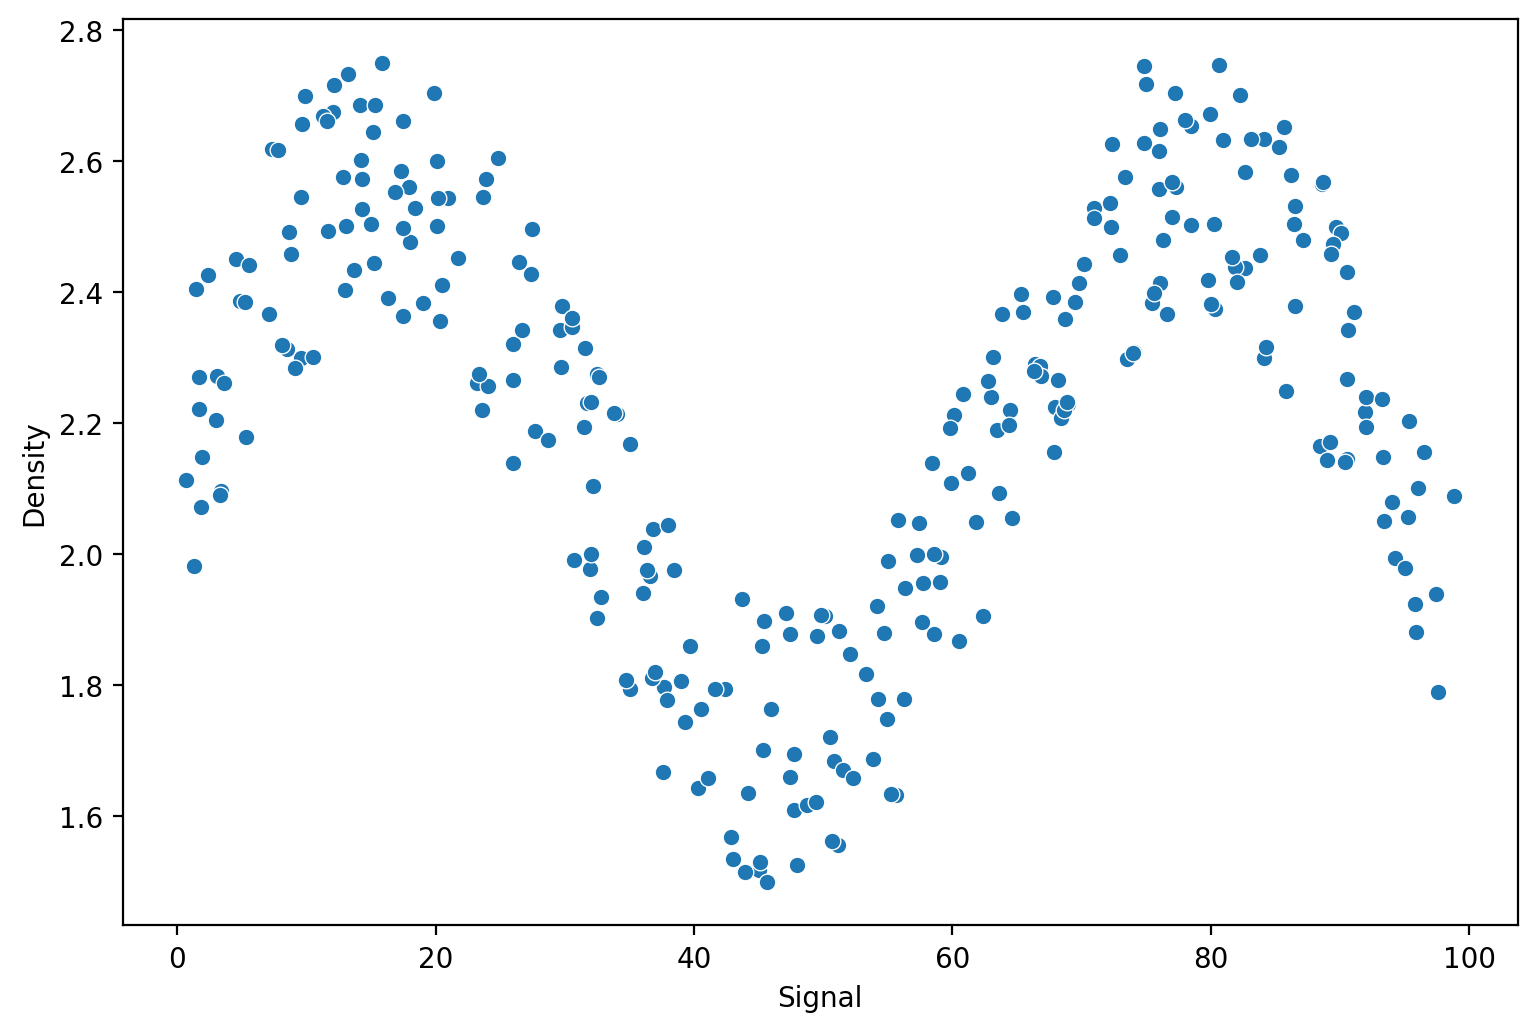

In [19]:
plt.figure(figsize=(9,6), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df);

Agora vamos definir uma lista de sinais para inserir em nosso modelo e ele fazer previsões.

In [20]:
signal_range = np.arange(0,100)

In [21]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
signal_preds[:10]

array([2.23246785, 2.23224007, 2.23201229, 2.23178451, 2.23155673,
       2.23132895, 2.23110117, 2.23087339, 2.23064562, 2.23041784])

Perceba que ele está fazendo previsões em uma extensão semelhante aos dados anteriores que inserimos nele (**X_test**).

Vamos agora plotar o nosso modelo em um gráfico para ver o que está ocorrendo.

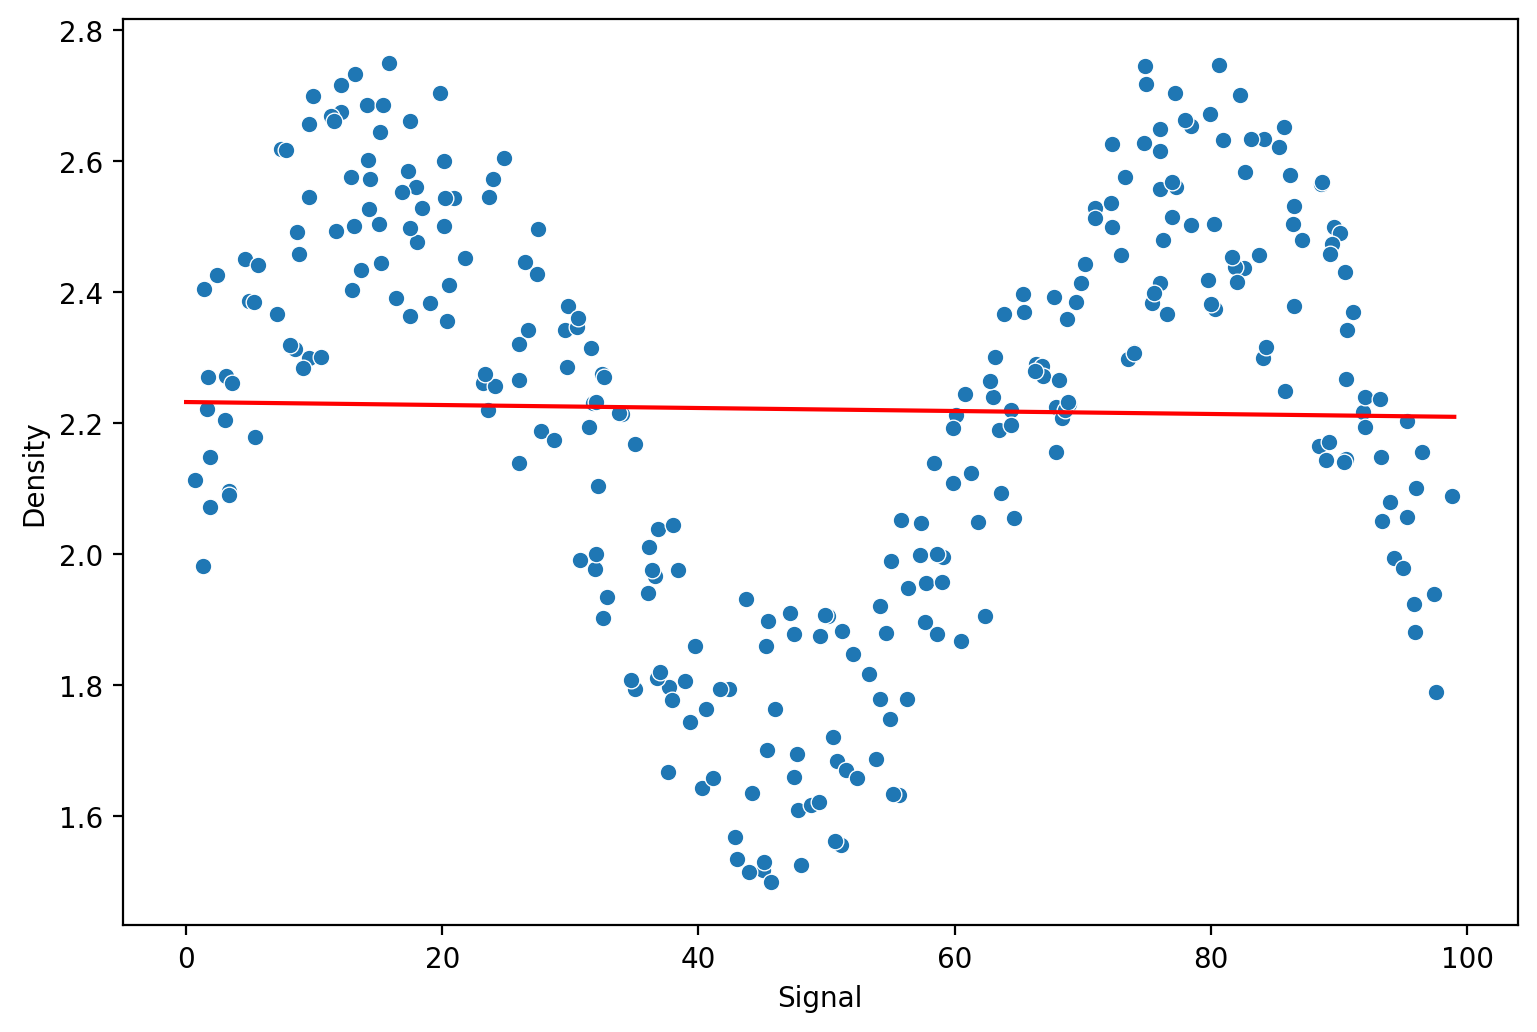

In [23]:
plt.figure(figsize=(9,6), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df);
plt.plot(signal_range, signal_preds, c='red');

O gráfico nos mostra que um modelo linear não pode ser ajustado nesses dados.

Agora tentaremos resolver este problema com uma **Regressão Polinomial**.

Definiremos uma função que nos ajudará a testar diferentes modelos, bem como apresentar as métricas de desempenho e o gráfico.

In [24]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(9,6), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df);
    plt.plot(signal_range, signal_preds, c='red');

E agora podemos testar essa função.

MAE: 0.3050895347509094
RMSE: 0.35204872731059866


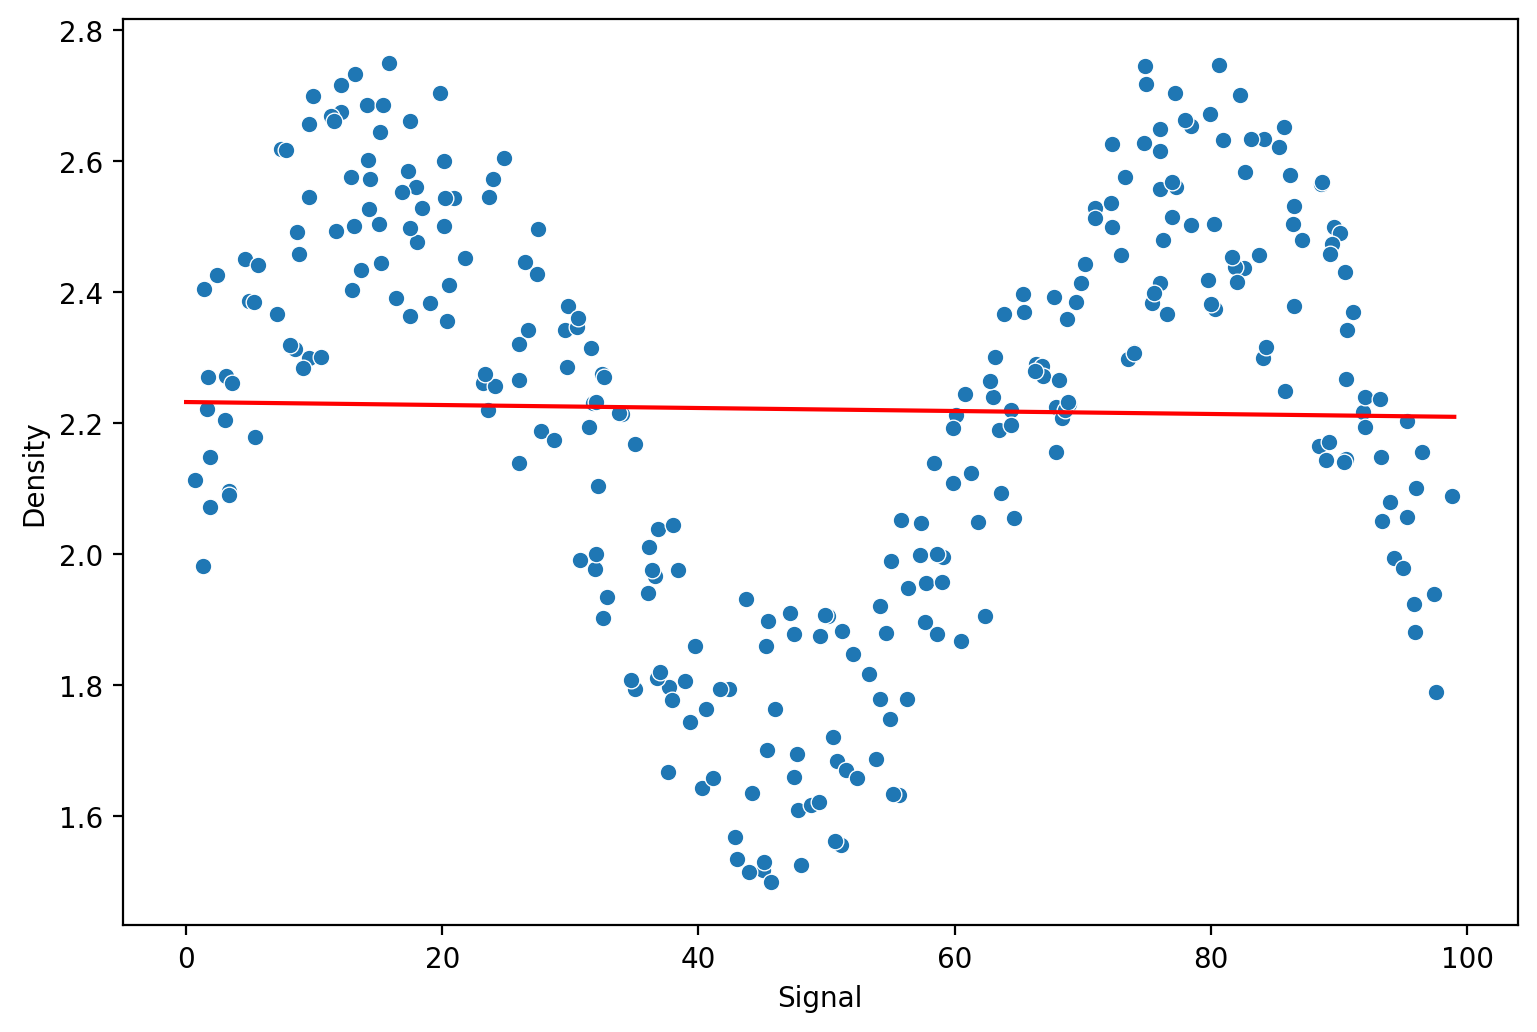

In [25]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

E agora vamos definir uma **Pipeline** para ordens de polinômio.

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

E agora **pipe** possui tudo que um modelo comum tem, vamos então usá-lo em nossa função que definimos anteriormente.

MAE: 0.2645041902101939
RMSE: 0.303153427336465


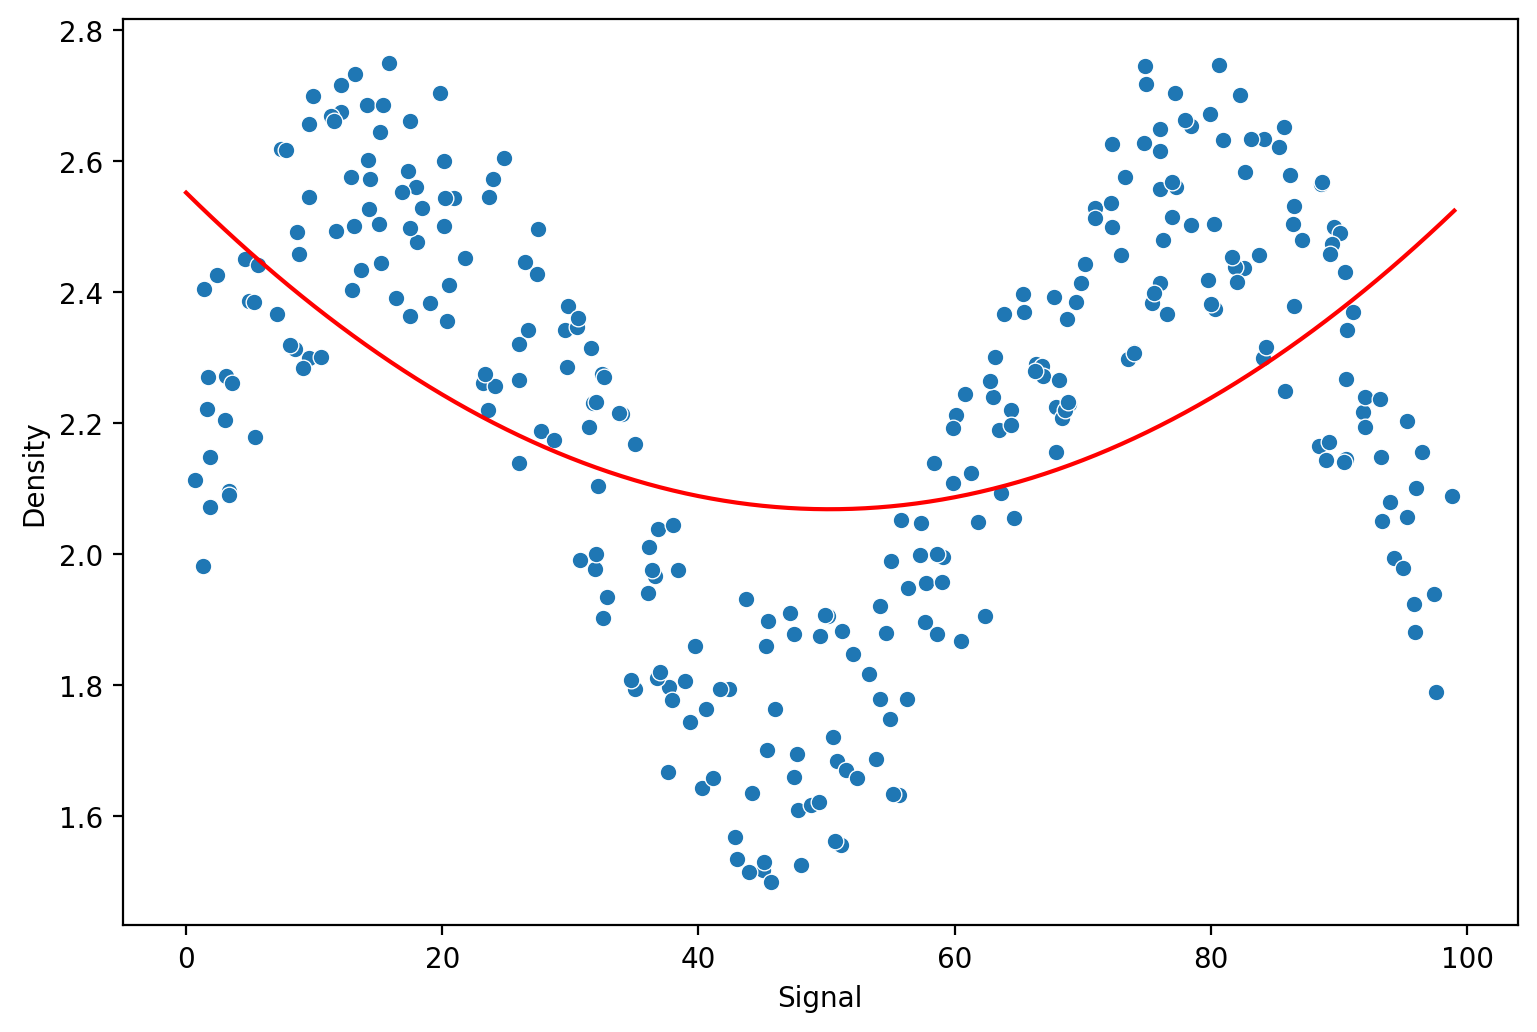

In [28]:
run_model(pipe, X_train, y_train, X_test, y_test)

Podemos aumentar o grau do polinômio e visualizar o ajuste da curva em relação aos dados.

In [32]:
p = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.10969391154476506
RMSE: 0.12794681370540334


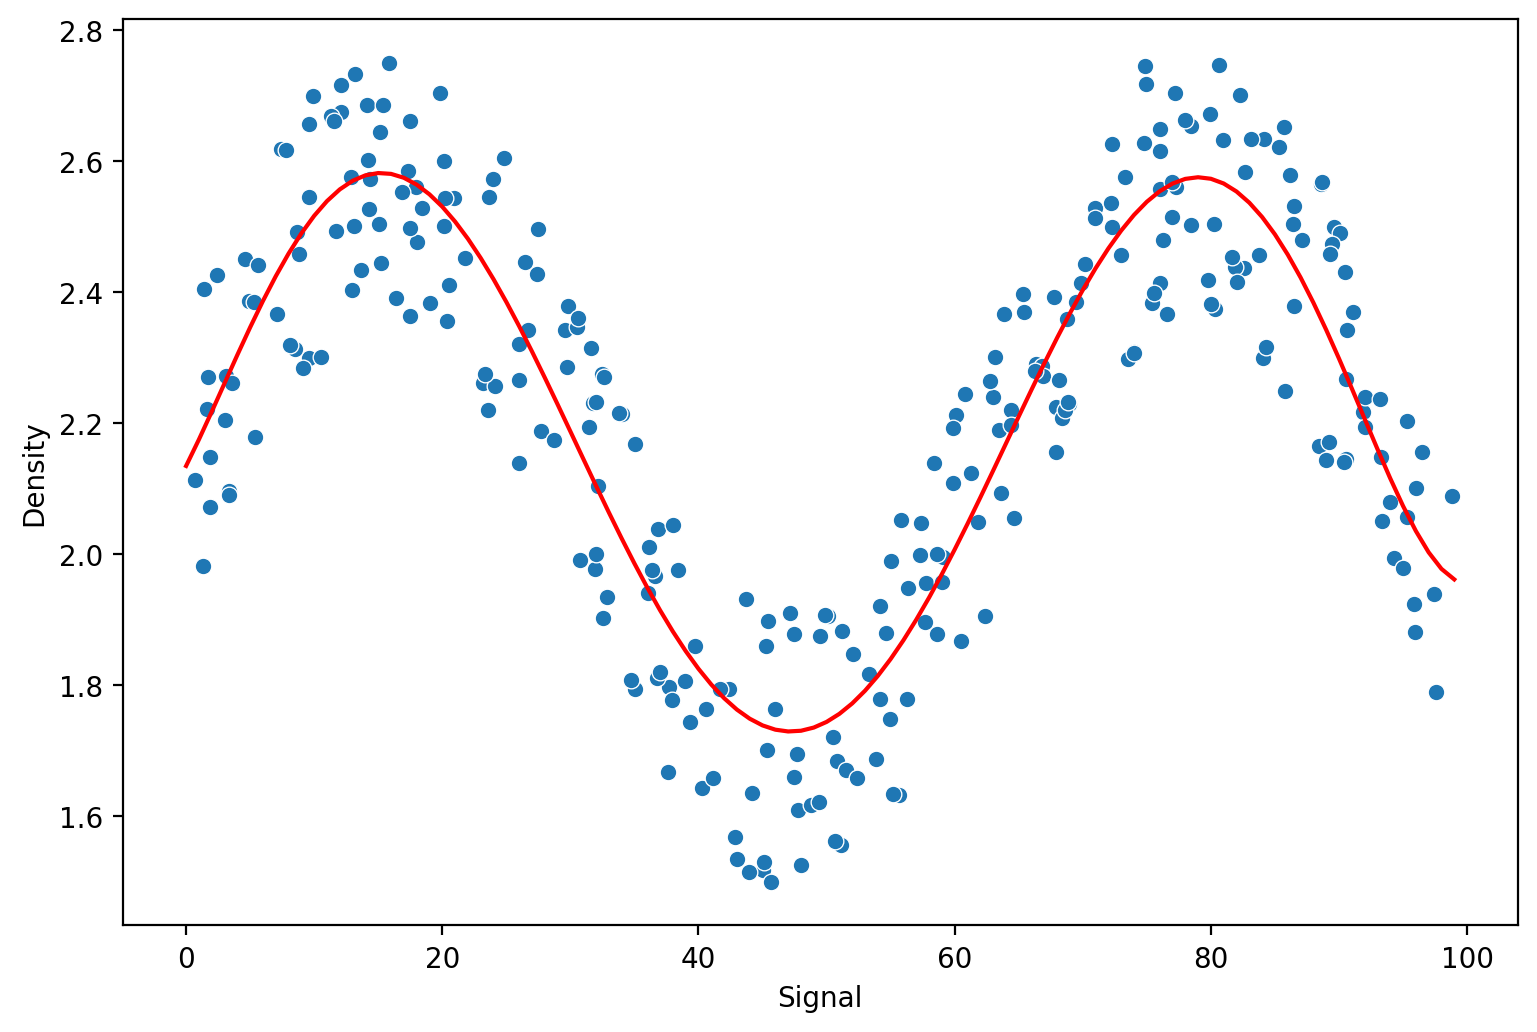

In [33]:
run_model(p, X_train, y_train, X_test, y_test)

Vamos agora explorar outros modelos de Regressão.

### KNeighborsRegressor

MAE: 0.1181976170772466
RMSE: 0.140364532371491
MAE: 0.12423060875255693
RMSE: 0.14119065330732666
MAE: 0.11995883444772665
RMSE: 0.13406707612799532


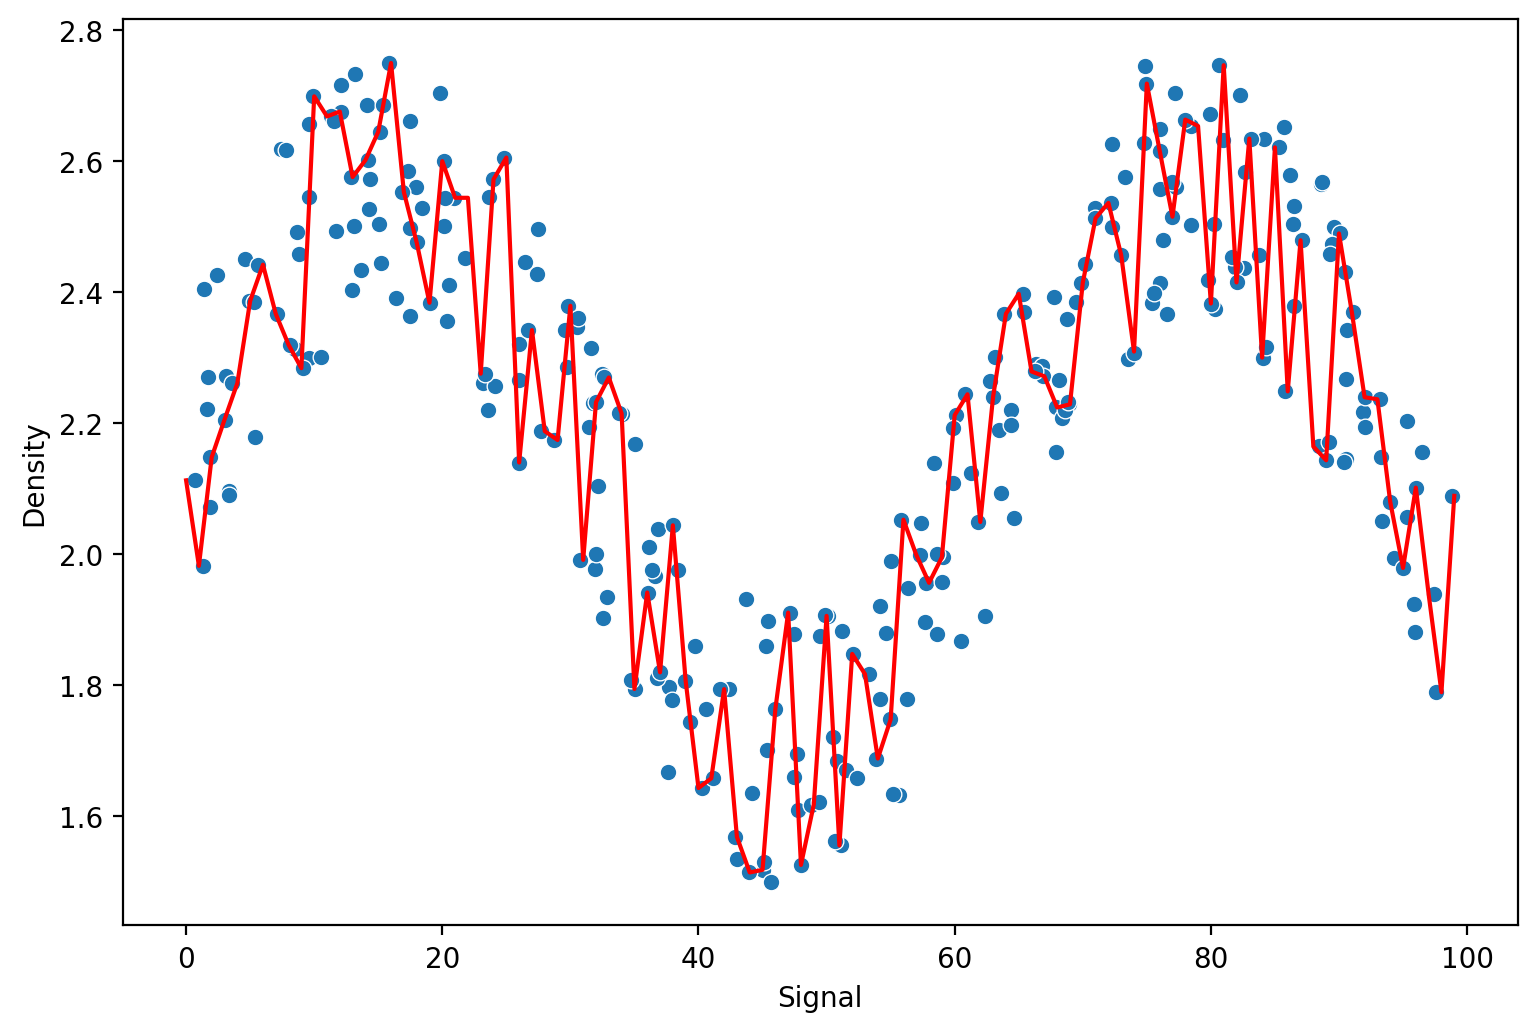

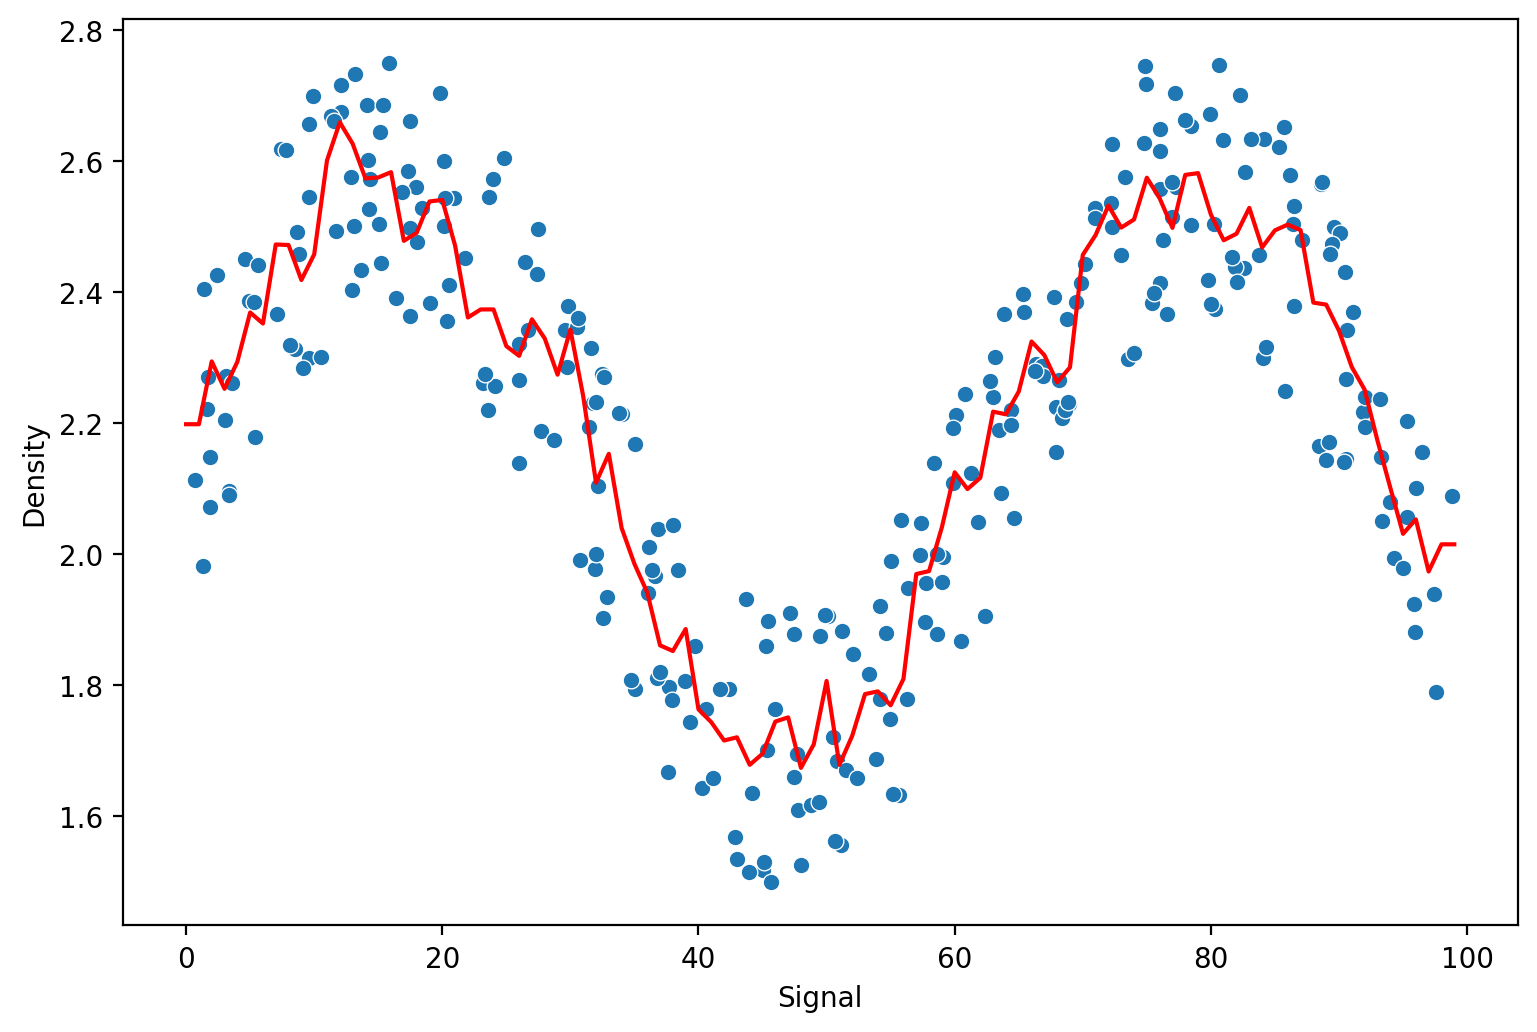

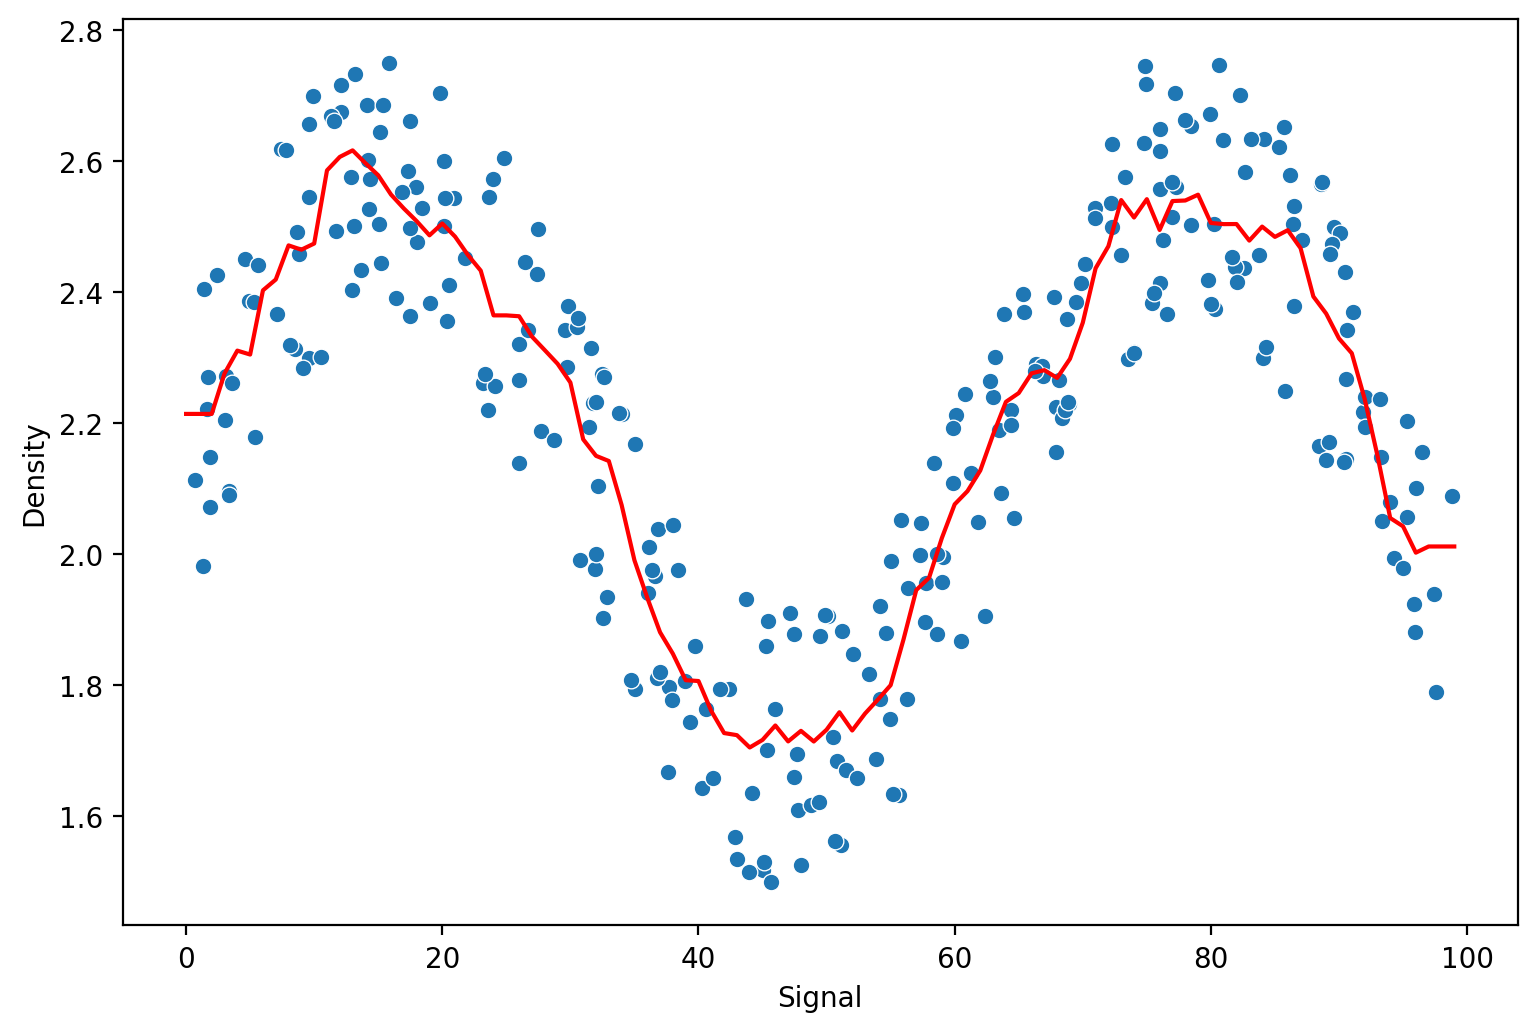

In [36]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,5,10]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model, X_train, y_train, X_test, y_test)

Perceba que conforme aumentamos o valor **k**, nosso modelo parece apresentar um ajuste mais adequado.

Também podemos testar um **DecisionTreeRegressor**.

### DecisionTreeRegressor

MAE: 0.1181976170772466
RMSE: 0.140364532371491


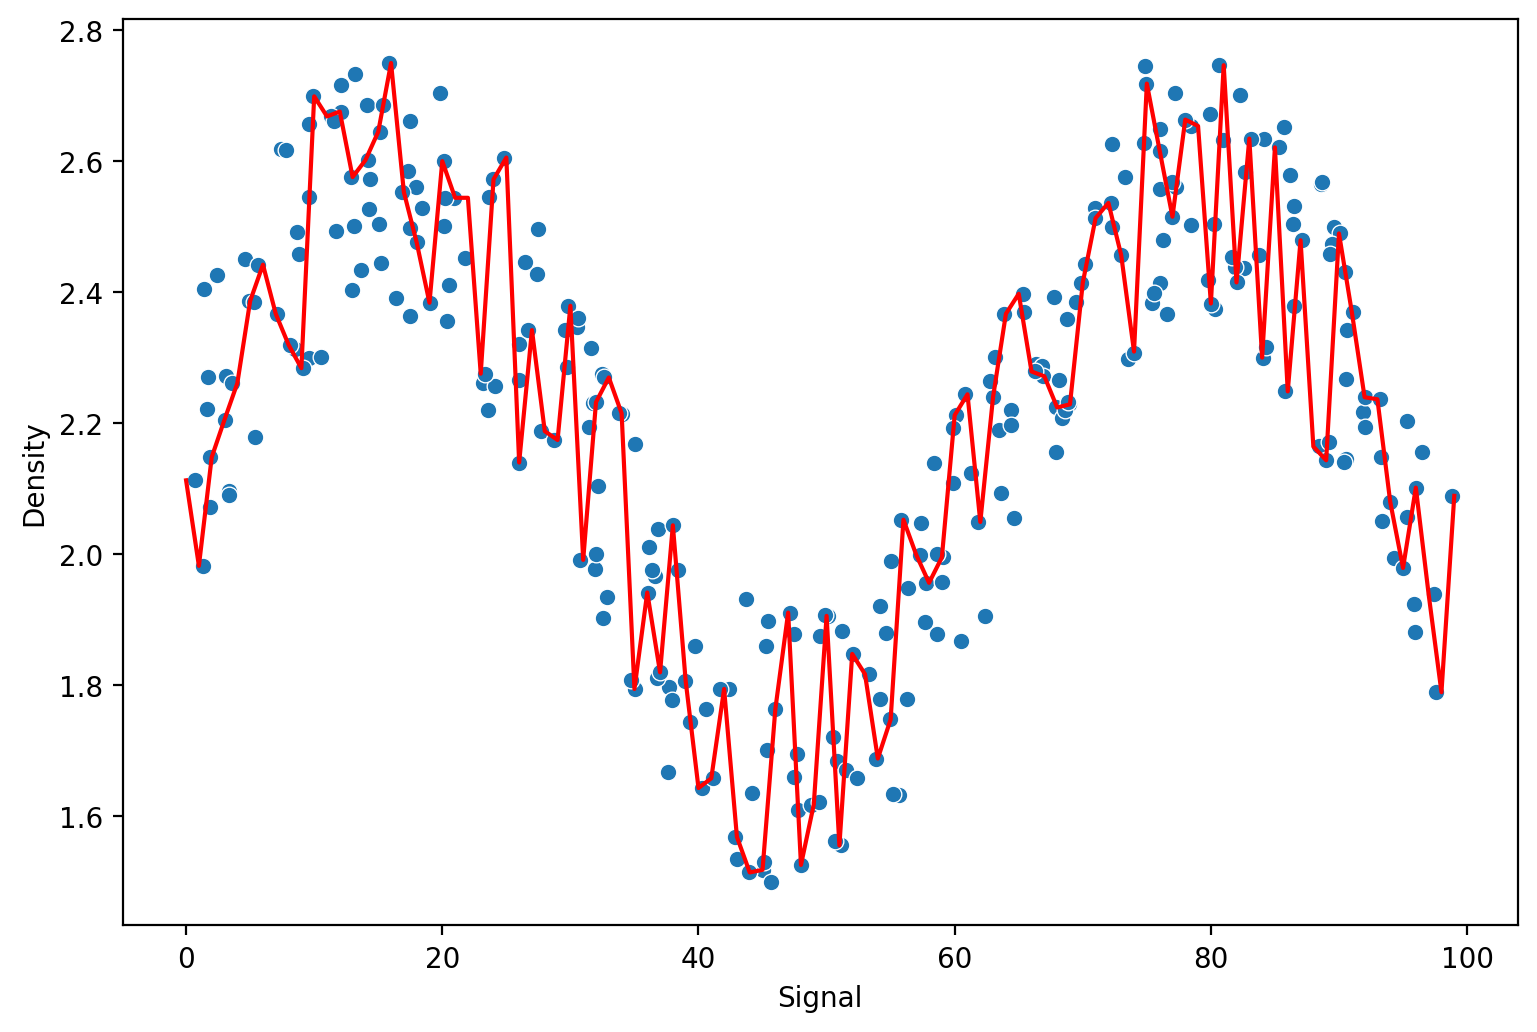

In [37]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Support Vector Regressor

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
              'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

MAE: 0.10977565820841723
RMSE: 0.1280321018507386


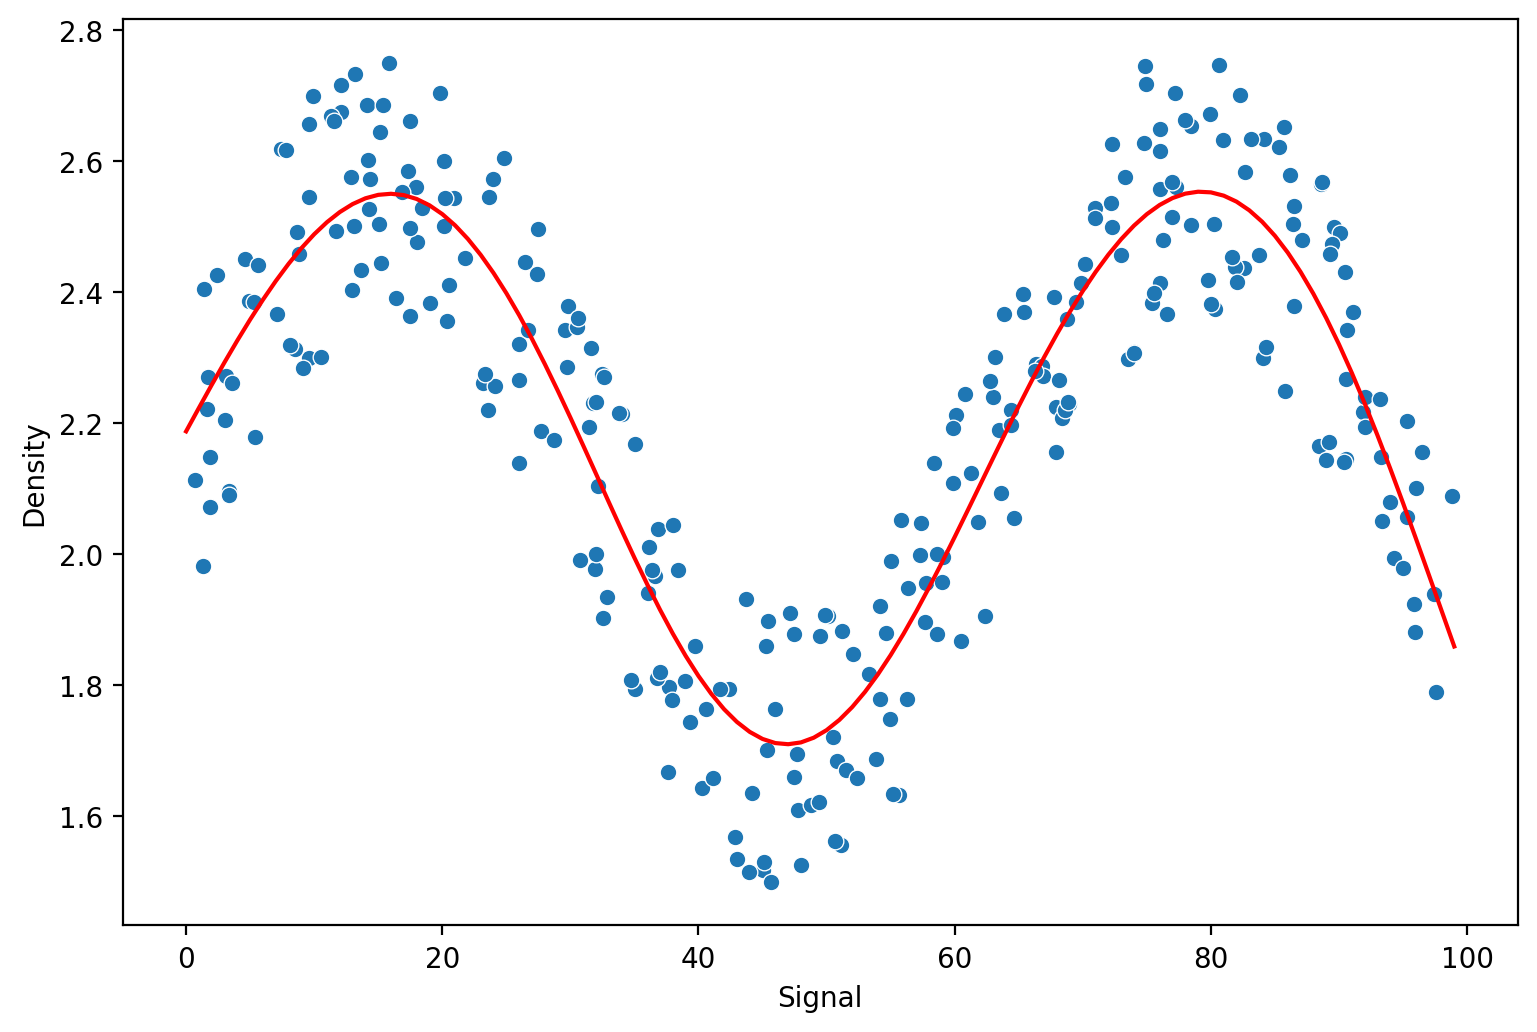

In [42]:
run_model(grid, X_train, y_train, X_test, y_test)

### RandomForestRegressor

MAE: 0.10863943597053033
RMSE: 0.13153988927801594


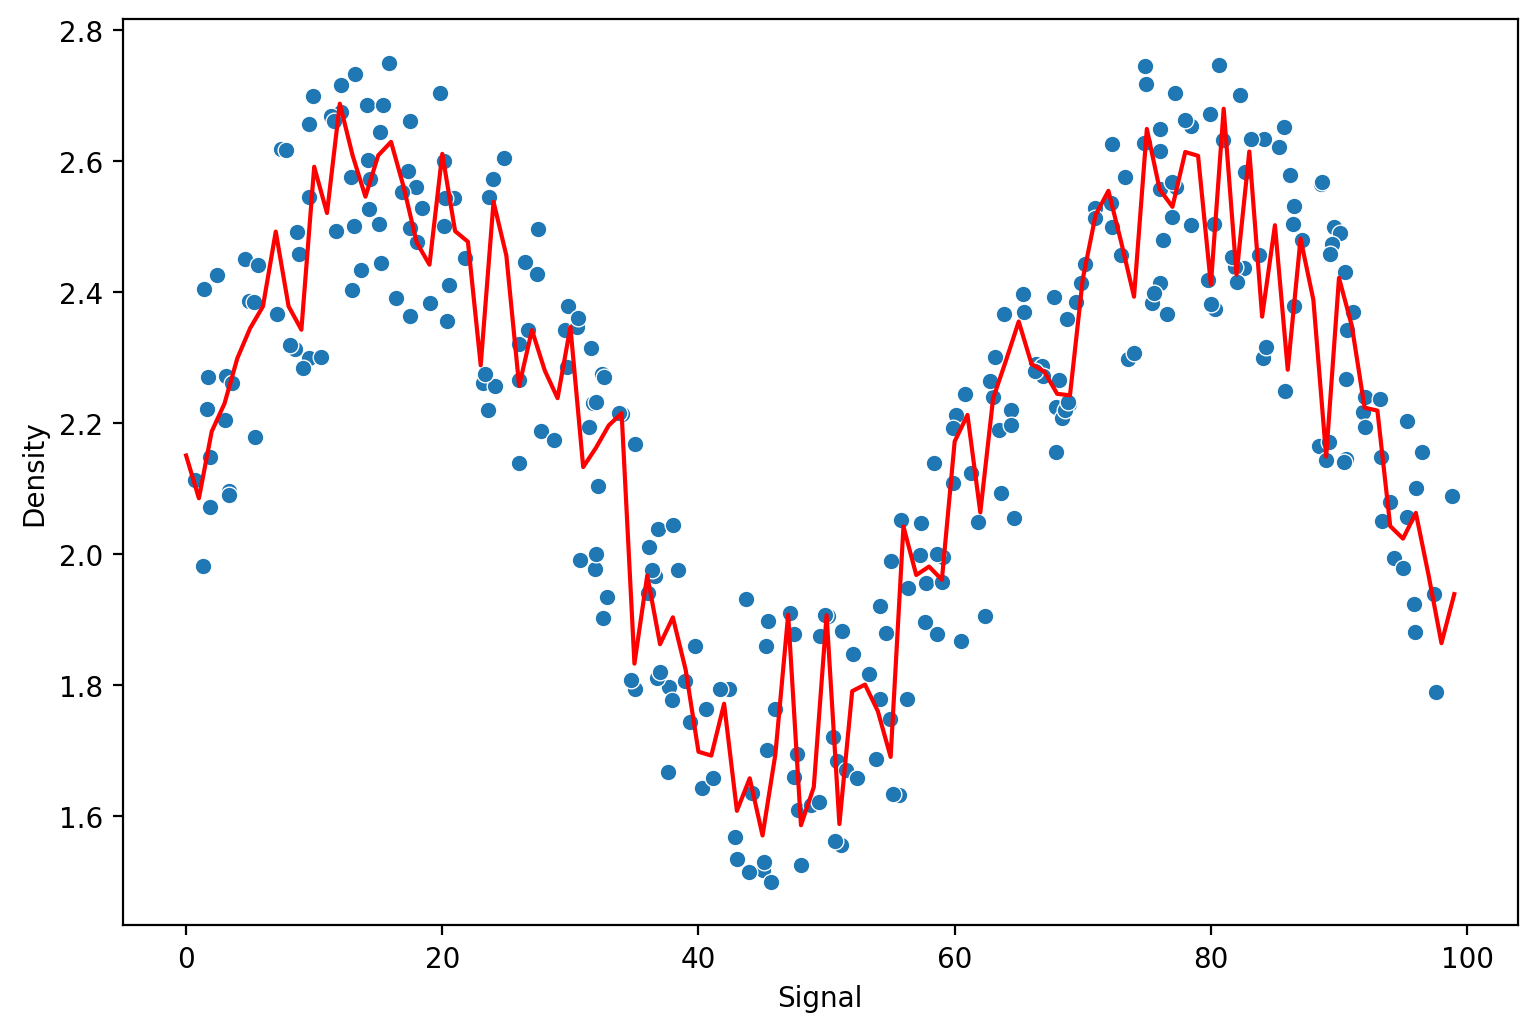

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)

run_model(rfr, X_train, y_train, X_test, y_test)